<h1>TAREA 2</h1>
<h2>Sergio Alejandro Diaz Pinilla</h2>
<h2>Julian Camilo Mendez Corredor</h2>
<p>1.Implemente (busque) un código para determinar, en el caso de señales bidimensionales (imágenes), alguna de las siguientes transformadas:</p>
  <li>Transformada de Hartley.</li>
  <li>Transformada de Walsh-Hadamard.</li>


<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; F. Prieto </h1>

In [2]:
%matplotlib inline
import cv2
import time
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division
from scipy.fftpack import fft, fftfreq
import pywt

img = cv2.imread('Fig/monta.png',0)
print "Listo"

Listo


Inicio


/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in log


(<matplotlib.axes._subplots.AxesSubplot at 0x10bbc0950>,
 <matplotlib.text.Text at 0x10bd20b10>)

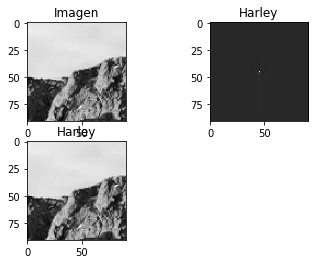

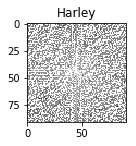

In [3]:
def ht(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    return fshift.real - fshift.imag

def iht(img):
    fshift = np.fft.ifftshift(img)
    f = np.fft.ifft2(fshift)
    return f.real + f.imag
print "Inicio"

trans = ht(img)
inv = iht(trans)

plt.figure(1)
plt.subplot(221), plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen')
plt.subplot(222), plt.imshow(trans, cmap=plt.cm.gray), plt.title('Harley')
plt.subplot(223), plt.imshow(inv, cmap=plt.cm.gray), plt.title('Harley')

plt.figure(2)

plt.subplot(222), plt.imshow(20*np.log(trans), cmap=plt.cm.gray), plt.title('Harley')



<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;"> </h1>
<p>2. Analice detalladamente el comportamiento, de al menos cuatro de las transformadas estudiadas, cuando ellas son empleadas para compresión de imágenes. Utilice imágenes reales y sintéticas.</p>

/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: ComplexWarning: Casting complex values to real discards the imaginary part


(<matplotlib.axes._subplots.AxesSubplot at 0x1124fa390>,
 <matplotlib.text.Text at 0x10e4ead10>)

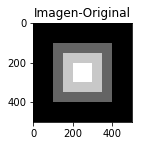

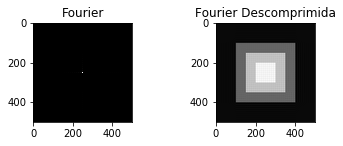

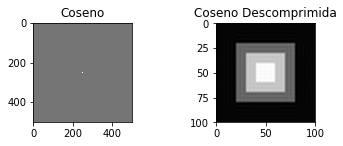

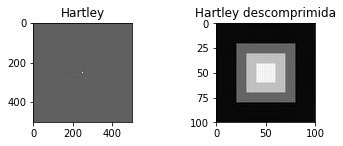

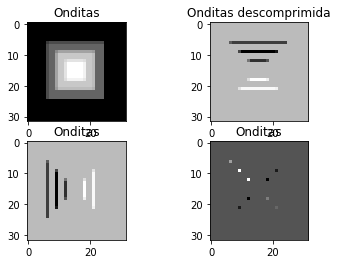

In [8]:
check = np.zeros((500, 500))
check[100:400, 100:400] = 100
check[150:350, 150:350] = 200
check[200:300, 200:300] = 255


def fft(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    return fshift

def ifft(img):
    fshift = np.fft.ifftshift(img)
    f = np.fft.ifft2(fshift)
    return f.real

def ctt(img):
    f = cv2.dct(img)
    fshift = np.fft.fftshift(f)
    return fshift
def ict(img):
    fshift = np.fft.fftshift(img)
    copy = np.zeros((500, 500))
    f = cv2.dct(fshift,copy,cv2.DCT_INVERSE)
    return f

def w2d(img, mode='haar', level=4):
    #convert to float
    imArray =  np.float32(img)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    """
    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)
    #Display result"""
    return coeffs
img_1_compreced = np.zeros((500, 500))
coeffs = w2d(check)
#Transformada de fourier
img_1 = fft(check)
img_1_compreced[200:300, 200:300] = img_1[200:300, 200:300]

img_1_descompreced = ifft(img_1_compreced)

#Transformada del coseno
img_2 = ctt(check)
img_2_compreced = img_2[200:300, 200:300]
img_2_descompreced = ict(img_2_compreced)

#Transformada de harley
img_3 = ht(check)
img_3_compreced = img_3[200:300, 200:300]
img_3_descompreced = iht(img_3_compreced)
plt.figure(1)
plt.subplot(221), plt.imshow(check, cmap=plt.cm.gray), plt.title('Imagen-Original')

plt.figure(2)
plt.subplot(221), plt.imshow(abs(img_1), cmap=plt.cm.gray), plt.title('Fourier')
plt.subplot(222), plt.imshow(img_1_descompreced, cmap=plt.cm.gray), plt.title('Fourier Descomprimida')


plt.figure(3)
plt.subplot(221), plt.imshow(img_2, cmap=plt.cm.gray), plt.title('Coseno')
plt.subplot(222), plt.imshow(img_2_descompreced, cmap=plt.cm.gray), plt.title('Coseno Descomprimida')

plt.figure(4)
plt.subplot(221), plt.imshow(img_3, cmap=plt.cm.gray), plt.title('Hartley')
plt.subplot(222), plt.imshow(img_3_descompreced, cmap=plt.cm.gray), plt.title('Hartley descomprimida')

plt.figure(5)
plt.subplot(221), plt.imshow(coeffs[0], cmap=plt.cm.gray), plt.title('Onditas')
plt.subplot(222), plt.imshow(coeffs[1][0], cmap=plt.cm.gray), plt.title('Onditas descomprimida')
plt.subplot(223), plt.imshow(coeffs[1][1], cmap=plt.cm.gray), plt.title('Onditas')
plt.subplot(224), plt.imshow(coeffs[1][2], cmap=plt.cm.gray), plt.title('Onditas')




<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;"> </h1>
<p>3. Analice detalladamente el comportamiento, de al menos cuatro de las transformadas estudiadas, cuando ellas son empleadas para reducción de ruido en imágenes. Utilice imágenes reales y sintéticas.</p>

(<matplotlib.axes._subplots.AxesSubplot at 0x1147d12d0>,
 <matplotlib.text.Text at 0x10689c490>)

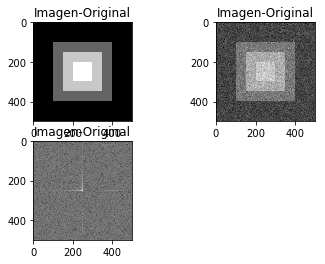

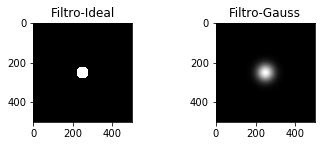

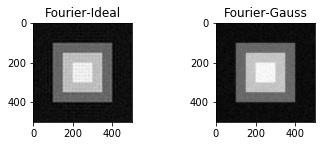

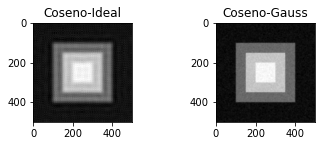

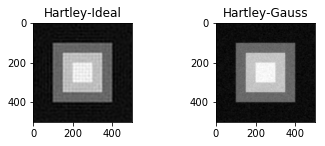

In [17]:
def ideal2d(shape, f , pxd = 1):
    pxd = float(pxd)
    rows, cols = shape
    x = np.linspace(-0.5,0.5,cols) * cols/pxd
    y = np.linspace(-0.5,0.5,rows) * rows/pxd
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:,np.newaxis])
    filt = np.ones(shape)
    filt[radius > f] = 0
    return filt

def gauss2d_lp(shape,filt,pxd=1):
    pxd = float(pxd)
    h,w = shape
    x= np.linspace(-0.5,0.5,w)*w/pxd
    y= np.linspace(-0.5,0.5,h)*h/pxd
    radio=np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
    
    pot=-0.5*(radio**2)/(filt**2)
    f=np.exp(pot)
    return f
def salt_peper(size,salt = 253,peper = 3):
    generator = np.random.randint(0,255,size)
    noise = np.zeros(size)
    noise[generator <= peper] = 0
    noise[generator >= salt] = 255
    return noise
    
    
gaussian_noise = np.zeros((500, 500))
cv2.randn(gaussian_noise,128,30);
img_noise = check + gaussian_noise

tt = fft(img_noise)
filter_mat = ideal2d(gaussian_noise.shape,30)
filter_mat2 = gauss2d_lp(gaussian_noise.shape,30)

img_filterI = ifft(fft(img_noise)*filter_mat)
img_filterG = ifft(fft(img_noise)*filter_mat2)

#Transformada del coseno
img_2_filterI = ict(ctt(img_noise)*filter_mat)
img_2_filterG = ifft(fft(img_noise)*filter_mat2)

#Transformada de harley

img_3_filterI = iht(ht(img_noise)*filter_mat)
img_3_filterG = ifft(fft(img_noise)*filter_mat2)

plt.figure(1)
plt.subplot(221), plt.imshow(check, cmap=plt.cm.gray), plt.title('Imagen-Original')
plt.subplot(222), plt.imshow(img_noise, cmap=plt.cm.gray), plt.title('Imagen-Original')
plt.subplot(223), plt.imshow(20*np.log(abs(tt)), cmap=plt.cm.gray), plt.title('Imagen-Original')

plt.figure(2)
plt.subplot(221), plt.imshow(filter_mat, cmap=plt.cm.gray), plt.title('Filtro-Ideal')
plt.subplot(222), plt.imshow(filter_mat2, cmap=plt.cm.gray), plt.title('Filtro-Gauss')

plt.figure(3)
plt.subplot(221), plt.imshow(img_filterI, cmap=plt.cm.gray), plt.title('Fourier-Ideal')
plt.subplot(222), plt.imshow(img_filterG, cmap=plt.cm.gray), plt.title('Fourier-Gauss')

plt.figure(4)
plt.subplot(221), plt.imshow(img_2_filterI, cmap=plt.cm.gray), plt.title('Coseno-Ideal')
plt.subplot(222), plt.imshow(img_2_filterG, cmap=plt.cm.gray), plt.title('Coseno-Gauss')

plt.figure(5)
plt.subplot(221), plt.imshow(img_3_filterI, cmap=plt.cm.gray), plt.title('Hartley-Ideal')
plt.subplot(222), plt.imshow(img_3_filterG, cmap=plt.cm.gray), plt.title('Hartley-Gauss')


(<matplotlib.axes._subplots.AxesSubplot at 0x10ddb3090>,
 <matplotlib.text.Text at 0x112b97fd0>)

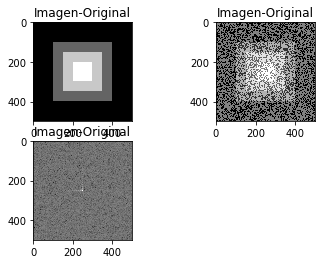

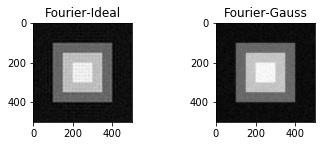

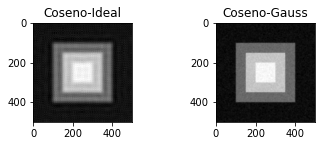

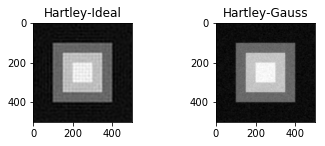

In [19]:
#Sal y pimienta
sp_noise = salt_peper(check.shape,100,100)
imgSP_noise = check + sp_noise
tt2 = fft(imgSP_noise)


plt.figure(1)
plt.subplot(221), plt.imshow(check, cmap=plt.cm.gray), plt.title('Imagen-Original')
plt.subplot(222), plt.imshow(imgSP_noise, cmap=plt.cm.gray), plt.title('Imagen-Original')
plt.subplot(223), plt.imshow(20*np.log(abs(tt2)), cmap=plt.cm.gray), plt.title('Imagen-Original')


imgSP_filterI = ifft(fft(img_noise)*filter_mat)
imgSP_filterG = ifft(fft(img_noise)*filter_mat2)

#Transformada del coseno
imgSP_2_filterI = ict(ctt(img_noise)*filter_mat)
imgSP_2_filterG = ifft(fft(img_noise)*filter_mat2)

#Transformada de harley

imgSP_3_filterI = iht(ht(img_noise)*filter_mat)
imgSP_3_filterG = ifft(fft(img_noise)*filter_mat2)

plt.figure(3)
plt.subplot(221), plt.imshow(imgSP_filterI, cmap=plt.cm.gray), plt.title('Fourier-Ideal')
plt.subplot(222), plt.imshow(imgSP_filterG, cmap=plt.cm.gray), plt.title('Fourier-Gauss')

plt.figure(4)
plt.subplot(221), plt.imshow(imgSP_2_filterI, cmap=plt.cm.gray), plt.title('Coseno-Ideal')
plt.subplot(222), plt.imshow(imgSP_2_filterG, cmap=plt.cm.gray), plt.title('Coseno-Gauss')

plt.figure(5)
plt.subplot(221), plt.imshow(imgSP_3_filterI, cmap=plt.cm.gray), plt.title('Hartley-Ideal')
plt.subplot(222), plt.imshow(imgSP_3_filterG, cmap=plt.cm.gray), plt.title('Hartley-Gauss')